# Setup Test Population

In [26]:
from src.controller.ga import GeneticAlgorithm, GAConfig
from src.model.molecule import Molecule
from src.model.population import Population
from src.model.fitness import compute_fitness


# Phosphor molecule we can add back later '[O][P][=Branch1][C][=O][Branch1][C][O][O]'

soup = ['[C][#N]', '[C][=O]', '[C][O]', '[C][C][O]', '[C][C][=O]', '[O][=C][C][O]', '[O][=C][O]', '[N][C][=Branch1][C][=O][N]', '[N]', '[O]', '[N][C][C][=Branch1][C][=O][O]', '[C][C][Branch1][=Branch1][C][=Branch1][C][=O][O][N]', '[C][C][=Branch1][C][=O][O]', '[C][C][N]', '[C][S]', '[C][C][=Branch1][C][=O][C][=Branch1][C][=O][O]', '[C][C][=Branch1][C][=O][C]', '[O][=C][=O]', '[O][=C][=S]', '[O][P][=Branch1][C][=O][Branch1][C][O][O]' ]

initial = []
for s in soup:
    initial.append(Molecule(s))

# initial = [
#     Molecule("[C][C]"),
#     Molecule("[C][O]"),
#     Molecule("[O][C]")
# ]

pop = Population(initial)

# Configure GA

In [27]:
cfg = GAConfig(
    mu=5,
    lam=5,
    mutation_rate=0.4,
    crossover_rate=0.9,
    tournament_k=2,
    random_seed=0
)

ga = GeneticAlgorithm(cfg, compute_fitness)

# Evolution and History

In [28]:
history = ga.evolve(pop, generations=10)
print("Evolution done!")

Generation  0
Generation  1
Generation  2
Generation  3
Generation  4
Generation  5
Generation  6
Generation  7
Generation  8
Generation  9
Evolution done!


[17:17:02] UFFTYPER: Unrecognized charge state for atom: 0
[17:17:02] UFFTYPER: Warning: hybridization set to SP3 for atom 2
[17:17:02] UFFTYPER: Unrecognized charge state for atom: 2
[17:17:02] UFFTYPER: Unrecognized charge state for atom: 2


# Visualize

Generation 0


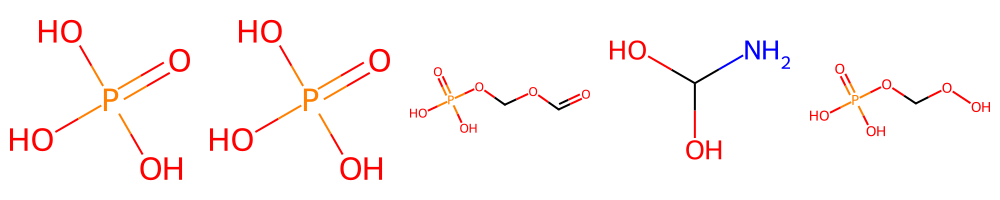

Generation 1


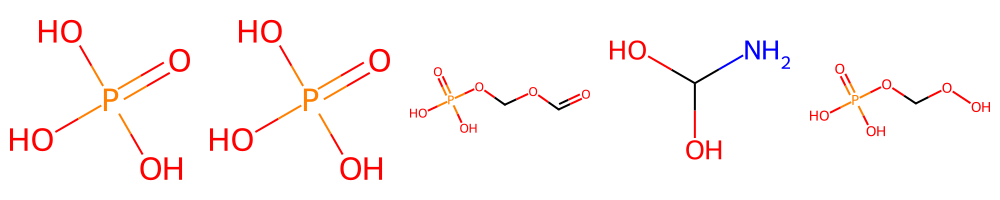

Generation 2


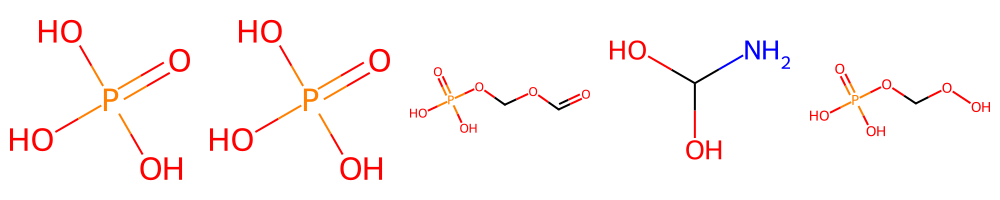

Generation 3


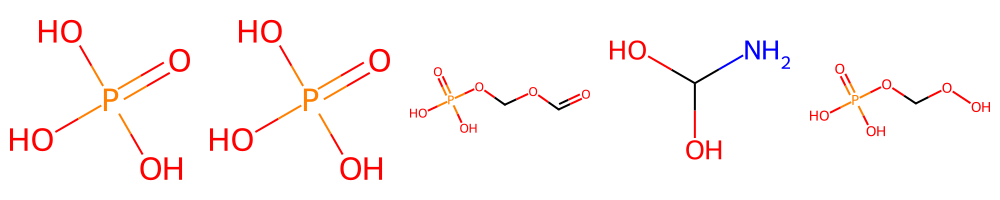

Generation 4


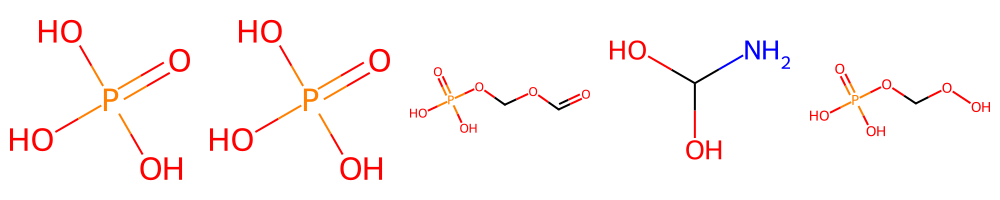

Generation 5


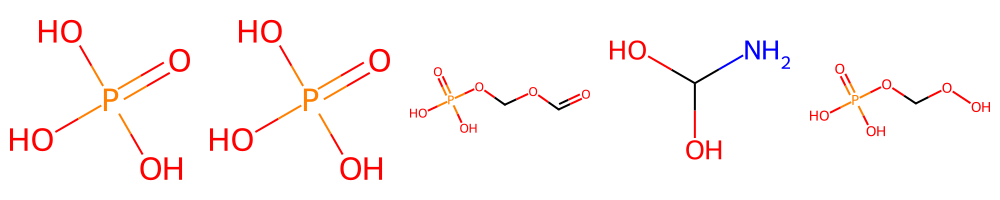

Generation 6


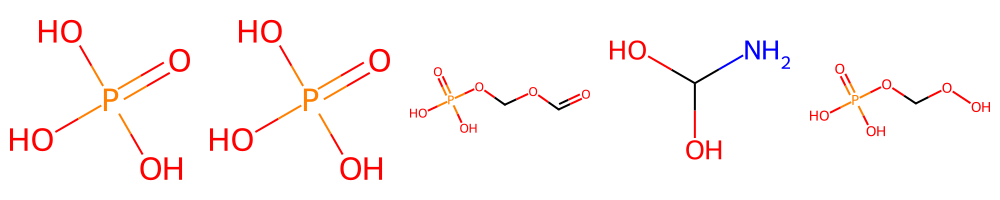

Generation 7


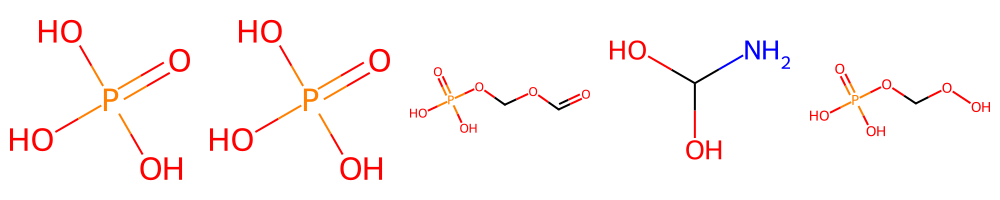

Generation 8


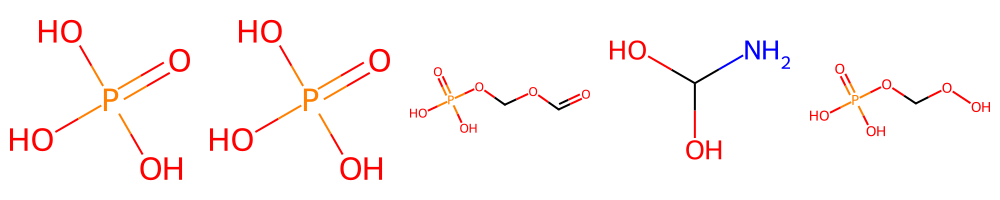

Generation 9


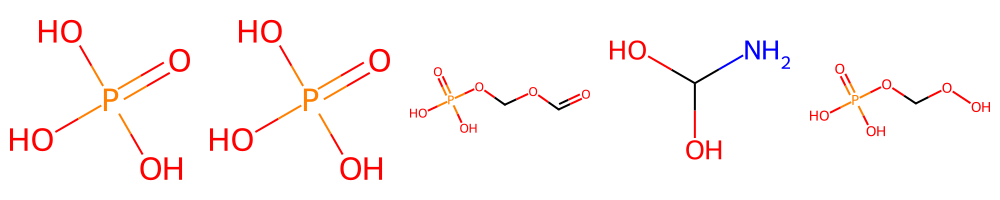

In [29]:
from src.view.viewer import population_grid
from IPython.display import display

for gen, p in enumerate(history):
    print(f"Generation {gen}")
    display(population_grid(p, n=6))

# Plot Mean Fitness Over Time

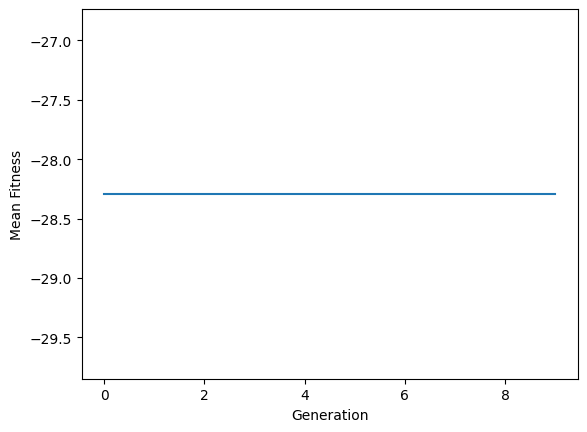

In [18]:
from src.view.plots import plot_fitness_over_time
plot_fitness_over_time(history)

# GIF?

In [19]:
import imageio
from rdkit.Chem.Draw import MolToImage
imgs = []

for p in history:
    best = min(p.molecules, key=lambda m: p.fitness[m])
    img = MolToImage(best.rdkit_mol, size=(300, 300))
    imgs.append(img)

imageio.mimsave("best_molecules.gif", imgs, duration=0.5)

In [25]:
for gen, p in enumerate(history):
    print(f"Generation {gen}")
    # display(population_grid(p, n=6))
    for n in p.molecules:
        print(n.selfies, "\n")


Generation 0
[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][N][C][=Branch1][C][=Branch1][C][#S+1][N] 

Generation 1
[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][N][C][=Branch1][C][=Branch1][C][#S+1][N] 

Generation 2
[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][N][C][=Branch1][C][=Branch1][C][#S+1][N] 

Generation 3
[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][=Branch1][C][=Branch1][C][=O][N] 

[N][C][N][C][=Branch1][C][=Branch1][C][#S+1][N] 

Generation 4
[N][C][=Branch1][C][=Branch1][C][#S+1][N] 

[N]